In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
keras.backend.tensorflow_backend.set_session(session) 

from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

NameError: name 'tensorflow' is not defined

In [ ]:
from tensorflow.keras import layers
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from PIL import Image
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/train.zip /content/
!unzip train.zip

In [ ]:
!cp /content/gdrive/MyDrive/validation.zip /content/
!unzip validation.zip

In [ ]:
!cp /content/gdrive/MyDrive/test.zip /content/
!unzip test.zip

In [ ]:
train_dir = 'train'
BATCH_SIZE = 15
IMG_SIZE = (200, 200)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Found 1605 files belonging to 3 classes.


In [ ]:
train_dataset_2= tf.keras.preprocessing.image_dataset_from_directory(train_dir, shuffle=True, batch_size=1, image_size=IMG_SIZE)

Found 1605 files belonging to 3 classes.


In [ ]:
validation_dir = 'validation'
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=1, image_size=IMG_SIZE)

Found 190 files belonging to 3 classes.


In [ ]:
test_dir = 'test'
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_dir, shuffle=True, batch_size=1, image_size=IMG_SIZE)

Found 208 files belonging to 3 classes.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
labels_dict = {0: 'incorrect_mask', 1: 'with_mask', 2: 'without_mask'}
print(labels_dict)

{0: 'incorrect_mask', 1: 'with_mask', 2: 'without_mask'}


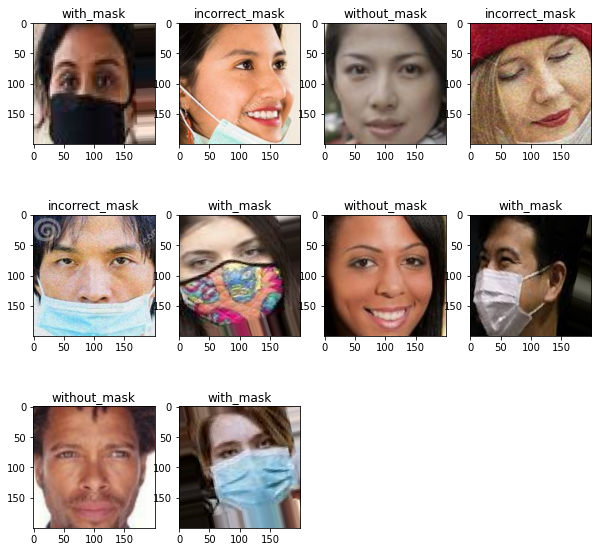

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [ ]:
autotune =  tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=autotune)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=autotune)
test_dataset = test_dataset.cache().prefetch(buffer_size=autotune)

In [ ]:
MyCnn = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  # Some thing I realised just
  # using flatten layer will 
  # increase the size of your
  # model, hence use
  # Global avg Pooling 
  # instead
  # layers.Flatten(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')])
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
MyModel = MyCnn.fit(train_dataset, validation_data = validation_dataset, epochs = 15)

Epoch 1/15
107/107 [==============================] - 9s 82ms/step - loss: 0.9526 - accuracy: 0.5249 - val_loss: 0.6117 - val_accuracy: 0.7947
Epoch 2/15
107/107 [==============================] - 9s 80ms/step - loss: 0.7370 - accuracy: 0.6663 - val_loss: 0.5045 - val_accuracy: 0.8105
Epoch 3/15
107/107 [==============================] - 9s 80ms/step - loss: 0.6503 - accuracy: 0.7194 - val_loss: 0.4666 - val_accuracy: 0.8211
Epoch 4/15
107/107 [==============================] - 9s 80ms/step - loss: 0.6152 - accuracy: 0.7423 - val_loss: 0.5178 - val_accuracy: 0.7947
Epoch 5/15
107/107 [==============================] - 9s 80ms/step - loss: 0.5532 - accuracy: 0.7833 - val_loss: 0.4424 - val_accuracy: 0.8368
Epoch 6/15
107/107 [==============================] - 9s 80ms/step - loss: 0.5166 - accuracy: 0.8081 - val_loss: 0.4628 - val_accuracy: 0.8158
Epoch 7/15
107/107 [==============================] - 9s 81ms/step - loss: 0.4615 - accuracy: 0.8232 - val_loss: 0.4292 - val_accuracy: 0.8263

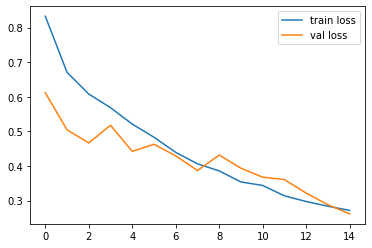

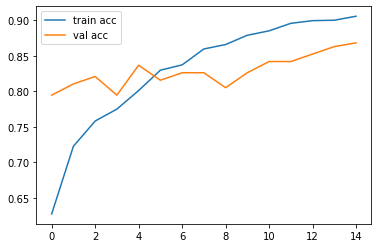

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(MyModel.history['loss'], label='train loss')
plt.plot(MyModel.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(MyModel.history['accuracy'], label='train acc')
plt.plot(MyModel.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predictions = MyCnn.predict(test_dataset)

In [ ]:
predictions.shape

(208, 3)

In [ ]:
y_hat = []
y = []
for element in test_dataset.as_numpy_iterator(): 
  prediction = MyCnn.predict(element[0]).flatten()
  result = np.where(prediction == np.amax(prediction))
  y_hat.append(result[0][0])
  y.append(element[1][0])
  # print(result[0][0])
  # print(element[0])
  # print(element[1][0])
  # break

In [ ]:
from sklearn.metrics import classification_report
target_names = ['incorrect_mask', 'with_mask','without_mask']

print(classification_report(y, y_hat, target_names=target_names, digits=4))

                precision    recall  f1-score   support

incorrect_mask     0.9848    0.8784    0.9286        74
     with_mask     0.8734    1.0000    0.9324        69
  without_mask     0.9524    0.9231    0.9375        65

      accuracy                         0.9327       208
     macro avg     0.9369    0.9338    0.9328       208
  weighted avg     0.9377    0.9327    0.9326       208



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_hat))

[[65  6  3]
 [ 0 69  0]
 [ 1  4 60]]


Text(69.0, 0.5, 'Truth')

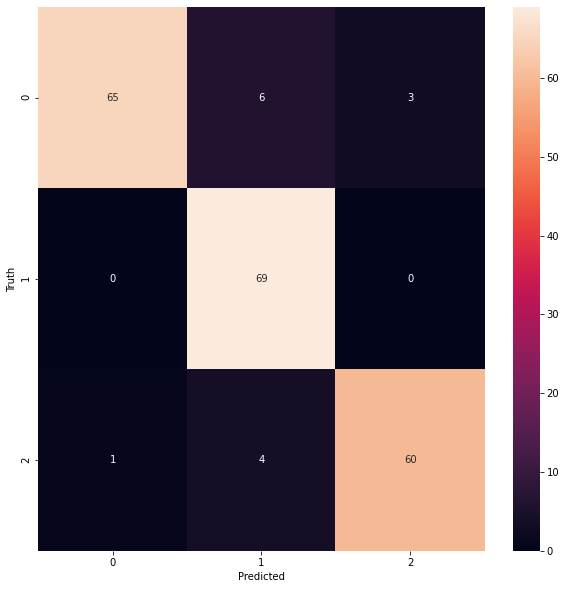

In [ ]:
cm = tf.math.confusion_matrix(labels=y, predictions=y_hat)
import seaborn as sn
plt.figure(figsize=(10, 10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False

In [ ]:
x = base_model.output
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Conv2D(512, (2,2), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
logdir = '/content/logs/sgd_0.0001'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
callbacks = [tensorboard_callback]

sgd = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_dataset_2, validation_data=validation_dataset, epochs=8, callbacks=callbacks)

Epoch 1/8
1605/1605 [==============================] - 60s 35ms/step - loss: 0.8563 - accuracy: 0.8007 - val_loss: 0.0768 - val_accuracy: 0.9737
Epoch 2/8
1605/1605 [==============================] - 53s 33ms/step - loss: 0.1820 - accuracy: 0.9512 - val_loss: 0.0417 - val_accuracy: 0.9895
Epoch 3/8
1605/1605 [==============================] - 53s 33ms/step - loss: 0.0771 - accuracy: 0.9774 - val_loss: 0.0659 - val_accuracy: 0.9842
Epoch 4/8
1605/1605 [==============================] - 53s 33ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0467 - val_accuracy: 0.9842
Epoch 5/8
1605/1605 [==============================] - 53s 33ms/step - loss: 0.0222 - accuracy: 0.9893 - val_loss: 0.0241 - val_accuracy: 0.9895
Epoch 6/8
1605/1605 [==============================] - 53s 33ms/step - loss: 0.0378 - accuracy: 0.9902 - val_loss: 0.0215 - val_accuracy: 0.9895
Epoch 7/8
1605/1605 [==============================] - 51s 32ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0262 - val_ac

In [ ]:
def extract_face(filename, required_size=(200, 200)):
	# load image from file
	pixels = plt.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array, x1, y1, x2, y2

In [ ]:
all_labels = []
img1_orig = cv2.imread('/content/gdrive/MyDrive/test_images/1.jpg')
img1 = cv2.cvtColor(img1_orig, cv2.COLOR_BGR2RGB)
img1 = np.reshape((cv2.resize(img1,(200,200))), [1,200,200,3]) 
face_pixels1, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/1.jpg')
face_pixels1_array = np.reshape(face_pixels1,[1,200,200,3])
prediction = MyCnn.predict(face_pixels1_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img1_rect = cv2.rectangle(img1_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img1_rect = cv2.rectangle(img1_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img1_rect = cv2.rectangle(img1_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img1_rect = cv2.cvtColor(img1_rect, cv2.COLOR_BGR2RGB)

In [ ]:
img2_orig = cv2.imread('/content/gdrive/MyDrive/test_images/2.jpg')
img2 = cv2.cvtColor(img2_orig, cv2.COLOR_BGR2RGB)
img2 = np.reshape((cv2.resize(img2,(200,200))), [1,200,200,3]) 
face_pixels2, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/2.jpg')
face_pixels2_array = np.reshape(face_pixels2,[1,200,200,3])
prediction = MyCnn.predict(face_pixels2_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img2_rect = cv2.rectangle(img2_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img2_rect = cv2.rectangle(img2_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img2_rect = cv2.rectangle(img2_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img2_rect = cv2.cvtColor(img2_rect, cv2.COLOR_BGR2RGB)

In [ ]:
image1 = np.reshape(cv2.resize(img1_rect, (200,200)), [1,200,200,3])
image2 = np.reshape(cv2.resize(img2_rect, (200,200)), [1,200,200,3])
rect_images = np.vstack((image1, image2))
original_images = np.vstack((img1, img2))

In [ ]:
img3_orig = cv2.imread('/content/gdrive/MyDrive/test_images/3.jpg')
img3 = cv2.cvtColor(img3_orig, cv2.COLOR_BGR2RGB)
img3 = np.reshape((cv2.resize(img3,(200,200))), [1,200,200,3])
face_pixels3, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/3.jpg')
face_pixels3_array = np.reshape(face_pixels3,[1,200,200,3])
prediction = MyCnn.predict(face_pixels3_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img3_rect = cv2.rectangle(img3_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img3_rect = cv2.rectangle(img3_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img3_rect = cv2.rectangle(img3_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img3_rect = cv2.cvtColor(img3_rect, cv2.COLOR_BGR2RGB)

In [ ]:
image3 = np.reshape(cv2.resize(img3_rect, (200,200)), [1,200,200,3])
rect_images = np.vstack((rect_images, image3))
original_images = np.vstack((original_images, img3))

In [ ]:
img4_orig = cv2.imread('/content/gdrive/MyDrive/test_images/4.jpg')
img4 = cv2.cvtColor(img4_orig, cv2.COLOR_BGR2RGB)
img4 = np.reshape((cv2.resize(img4,(200,200))), [1,200,200,3])
face_pixels4, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/4.jpg')
face_pixels4_array = np.reshape(face_pixels4,[1,200,200,3])
prediction = MyCnn.predict(face_pixels4_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img4_rect = cv2.rectangle(img4_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img4_rect = cv2.rectangle(img4_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img4_rect = cv2.rectangle(img4_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img4_rect = cv2.cvtColor(img4_rect, cv2.COLOR_BGR2RGB)

In [ ]:
image4 = np.reshape(cv2.resize(img4_rect, (200,200)), [1,200,200,3])
rect_images = np.vstack((rect_images, image4))
original_images = np.vstack((original_images, img4))

In [ ]:
img5_orig = cv2.imread('/content/gdrive/MyDrive/test_images/5.jpg')
img5 = cv2.cvtColor(img5_orig, cv2.COLOR_BGR2RGB)
img5 = np.reshape((cv2.resize(img5,(200,200))), [1,200,200,3])
face_pixels5, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/5.jpg')
face_pixels5_array = np.reshape(face_pixels5,[1,200,200,3])
prediction = MyCnn.predict(face_pixels5_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img5_rect = cv2.rectangle(img5_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img5_rect = cv2.rectangle(img5_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img5_rect = cv2.rectangle(img5_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img5_rect = cv2.cvtColor(img5_rect, cv2.COLOR_BGR2RGB)

In [ ]:
image5 = np.reshape(cv2.resize(img5_rect, (200,200)), [1,200,200,3])
rect_images = np.vstack((rect_images, image5))
original_images = np.vstack((original_images, img5))

In [ ]:
img6_orig = cv2.imread('/content/gdrive/MyDrive/test_images/6.jpg')
img6 = cv2.cvtColor(img6_orig, cv2.COLOR_BGR2RGB)
img6 = np.reshape((cv2.resize(img6,(200,200))), [1,200,200,3])
face_pixels6, x_1, y_1, x_2, y_2 = extract_face('/content/gdrive/MyDrive/test_images/6.jpg')
face_pixels6_array = np.reshape(face_pixels6,[1,200,200,3])
prediction = MyCnn.predict(face_pixels6_array)
result = np.where(prediction == np.amax(prediction))
label = result[1][0]
all_labels.append(label)
if label == 0:
  img6_rect = cv2.rectangle(img6_orig, (x_1, y_1), (x_2, y_2), (255,0,0), 10)
elif label == 1:
  img6_rect = cv2.rectangle(img6_orig, (x_1, y_1), (x_2, y_2), (0,255,0), 10)
elif label == 2:
  img6_rect = cv2.rectangle(img6_orig, (x_1, y_1), (x_2, y_2), (0,0,255), 10)
img6_rect = cv2.cvtColor(img6_rect, cv2.COLOR_BGR2RGB)

In [ ]:
image6 = np.reshape(cv2.resize(img6_rect, (200,200)), [1,200,200,3])
rect_images = np.vstack((rect_images, image6))
original_images = np.vstack((original_images, img6))

In [ ]:
original_images.shape

(6, 200, 200, 3)

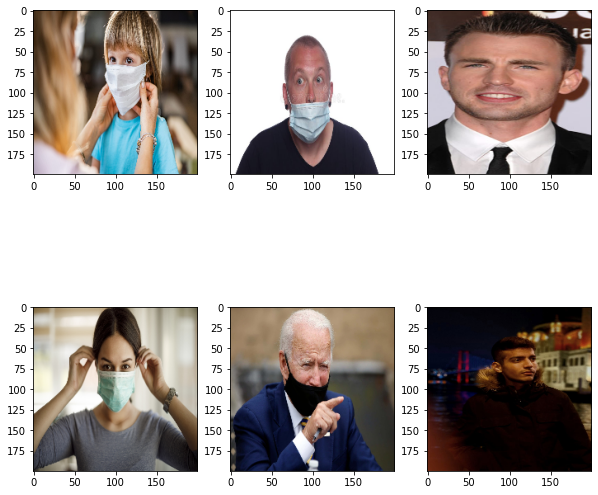

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Original Images')
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(original_images[i])

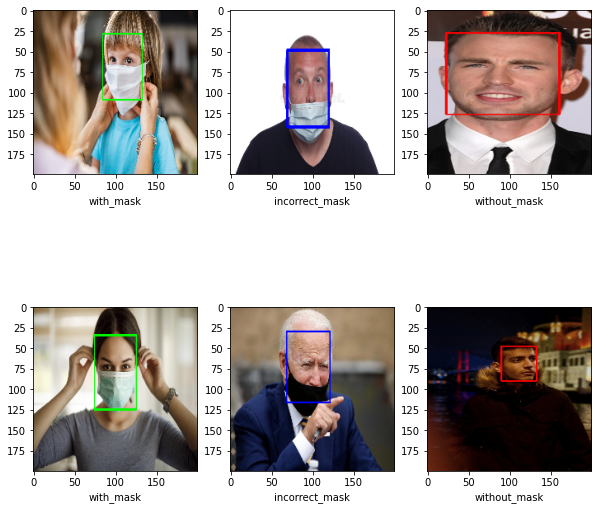

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    label = labels_dict.get(all_labels[i])
    plt.xlabel(label)
    plt.imshow(rect_images[i])